In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [4]:
df=data.head(10)

Univariate Analysis

In [5]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

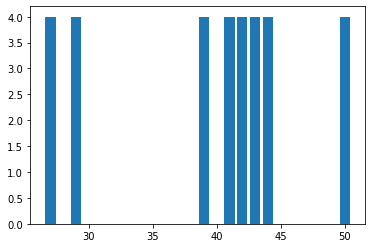

In [6]:
plt.bar (df['Age'],4)

Bivariate Analysis

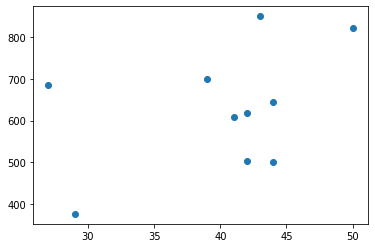

In [7]:
plt.scatter(df['Age'],df['CreditScore'])

Multivariate analysis

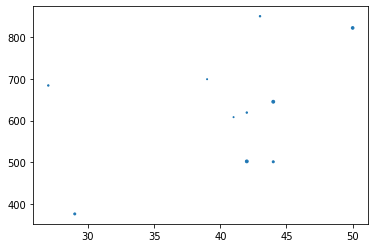

In [8]:
plt.scatter(df['Age'],df['CreditScore'],df['Tenure'])

 Perform descriptive statistics on the dataset

In [9]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

Handling Missing values

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 Find the outliers and replace the outliers

Finding Outliners

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


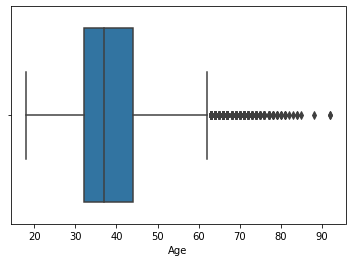

In [11]:
sns.boxplot(data['Age'])

Removing outliners

In [12]:
q=data.quantile(q=[0.75,0.5])

In [13]:
iqr=q.iloc[0]-q.iloc[1]

In [14]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [15]:
l=q.iloc[1]-(1.5*iqr)

In [16]:
l['Age']

26.5

In [17]:
u=q.iloc[1]+(1.5*iqr)

In [18]:
u['Age']

47.5

In [19]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


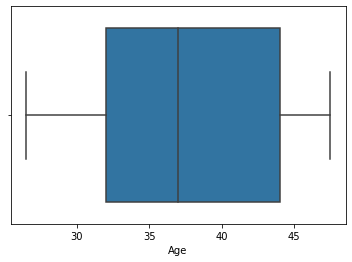

In [20]:
sns.boxplot(data['Age'])

 Check for Categorical columns and perform encoding.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10 non-null     int64  
 1   CustomerId       10 non-null     int64  
 2   Surname          10 non-null     object 
 3   CreditScore      10 non-null     int64  
 4   Geography        10 non-null     object 
 5   Gender           10 non-null     object 
 6   Age              10 non-null     int64  
 7   Tenure           10 non-null     int64  
 8   Balance          10 non-null     float64
 9   NumOfProducts    10 non-null     int64  
 10  HasCrCard        10 non-null     int64  
 11  IsActiveMember   10 non-null     int64  
 12  EstimatedSalary  10 non-null     float64
 13  Exited           10 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [23]:
le=LabelEncoder()

In [24]:
data['Surname']=le.fit_transform(data['Surname'])

In [25]:
data

RowNumber  CustomerId  Surname  CreditScore Geography  Gender   Age  \
0             1    15634602     1115          619    France  Female  42.0   
1             2    15647311     1177          608     Spain  Female  41.0   
2             3    15619304     2040          502    France  Female  42.0   
3             4    15701354      289          699    France  Female  39.0   
4             5    15737888     1822          850     Spain  Female  43.0   
...         ...         ...      ...          ...       ...     ...   ...   
9995       9996    15606229     1999          771    France    Male  39.0   
9996       9997    15569892     1336          516    France    Male  35.0   
9997       9998    15584532     1570          709    France  Female  36.0   
9998       9999    15682355     2345          772   Germany    Male  42.0   
9999      10000    15628319     2751          792    France  Female  28.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [26]:
data['Geography']=le.fit_transform(data['Geography'])

In [27]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])

In [28]:
data

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0             1    15634602     1115          619          0       1  42.0   
1             2    15647311     1177          608          2       1  41.0   
2             3    15619304     2040          502          0       1  42.0   
3             4    15701354      289          699          0       1  39.0   
4             5    15737888     1822          850          2       1  43.0   
...         ...         ...      ...          ...        ...     ...   ...   
9995       9996    15606229     1999          771          0       0  39.0   
9996       9997    15569892     1336          516          0       0  35.0   
9997       9998    15584532     1570          709          0       1  36.0   
9998       9999    15682355     2345          772          1       0  42.0   
9999      10000    15628319     2751          792          0       1  28.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

Split the data into dependent and independent variables.

Independent Variables

In [29]:
x=data.iloc[:,0:13]
x

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0             1    15634602     1115          619          0       1  42.0   
1             2    15647311     1177          608          2       1  41.0   
2             3    15619304     2040          502          0       1  42.0   
3             4    15701354      289          699          0       1  39.0   
4             5    15737888     1822          850          2       1  43.0   
...         ...         ...      ...          ...        ...     ...   ...   
9995       9996    15606229     1999          771          0       0  39.0   
9996       9997    15569892     1336          516          0       0  35.0   
9997       9998    15584532     1570          709          0       1  36.0   
9998       9999    15682355     2345          772          1       0  42.0   
9999      10000    15628319     2751          792          0       1  28.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  
0           101348.88  
1           112542.58  
2           113931.57  
3            93826.63  
4            79084.10  
...               ...  
9995         96270.64  
9996        101699.77  
9997         42085.58  
9998         92888.52  
9999         38190.78  

[10000 rows x 13 columns]

Dependent Variables

In [30]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Scale the independent variables


In [31]:
from sklearn.preprocessing import scale

In [32]:
scale(x)


array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

Split the data into training and testing

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
x_train

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
4145       4146    15729018       49          666          0       1  33.0   
4646       4647    15665008     2449          805          1       1  26.5   
2963       2964    15718071     2662          655          0       1  47.5   
6190       6191    15613923     2249          581          2       1  43.0   
6486       6487    15592761     2665          710          0       0  40.0   
...         ...         ...      ...          ...        ...     ...   ...   
2513       2514    15755825     1749          666          0       0  39.0   
3778       3779    15658486      998          579          2       1  47.5   
5394       5395    15668853     1787          637          2       1  44.0   
3007       3008    15697997     1314          602          0       0  33.0   
7765       7766    15613427      167          683          1       1  47.5   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
4145       2  147229.65              1          1               1   
4646       8   42712.87              2          1               1   
2963       3       0.00              2          0               1   
6190       4  170172.90              1          0               1   
6486       5       0.00              2          0               0   
...      ...        ...            ...        ...             ...   
2513      10       0.00              2          1               0   
3778       3  148021.12              1          1               1   
5394       0  157622.58              1          1               1   
3007       5  164704.38              1          0               1   
7765       7  108797.63              2          0               0   

      EstimatedSalary  
4145         56410.17  
4646         28861.69  
2963         15801.02  
6190        100236.02  
6486        162878.96  
...               ...  
2513        102999.33  
3778         74878.22  
5394        120454.20  
3007        180716.10  
7765        140763.18  

[8000 rows x 13 columns]

In [36]:
x_train.shape

(8000, 13)

In [37]:
y_train

4145    0
4646    0
2963    0
6190    0
6486    0
       ..
2513    0
3778    0
5394    0
3007    1
7765    0
Name: Exited, Length: 8000, dtype: int64

In [38]:
y_train.shape

(8000,)

In [39]:
x_test

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
3723       3724    15710978     2100          715          1       0  42.0   
8599       8600    15708713     1177          633          0       0  35.0   
5506       5507    15697028     1730          590          2       0  34.0   
2132       2133    15599722      464          609          2       1  43.0   
8602       8603    15684348     2915          656          0       0  47.5   
...         ...         ...      ...          ...        ...     ...   ...   
9458       9459    15665064     1129          523          0       0  36.0   
2185       2186    15730397     1898          739          2       0  40.0   
6348       6349    15707505     2582          699          2       0  31.0   
5384       5385    15679813      806          727          2       0  28.0   
4229       4230    15808326     1693          592          0       1  34.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
3723       2   88120.97              2          1               1   
8599       3       0.00              2          1               1   
5506       0   65812.35              2          0               1   
2132       6   86053.52              2          1               1   
8602       8       0.00              2          0               1   
...      ...        ...            ...        ...             ...   
9458       8  158351.02              2          1               0   
2185       1  109681.61              1          1               1   
6348       8  125927.51              2          1               0   
5384       1       0.00              1          1               0   
4229       9       0.00              2          1               1   

      EstimatedSalary  
3723         21333.22  
8599         36249.76  
5506        160346.30  
2132        113276.46  
8602         57014.43  
...               ...  
9458        155304.53  
2185        193321.30  
6348        147661.47  
5384         40357.39  
4229         20460.20  

[2000 rows x 13 columns]

In [40]:
x_test.shape

(2000, 13)

In [41]:
y_test

3723    0
8599    0
5506    0
2132    1
8602    0
       ..
9458    0
2185    0
6348    0
5384    0
4229    0
Name: Exited, Length: 2000, dtype: int64

In [42]:
y_test.shape

(2000,)